# Imports

In [567]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [568]:
dataset = load_iris()
display(dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [569]:
print(dataset['target_names'])
print(dataset['feature_names'])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [570]:
dataset['data'].shape

(150, 4)

Thus we have 150 data points, to classify flowers into 3 categories from 4 features

In [571]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.3)
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105,)


Pandas

In [572]:
df = pd.DataFrame(X_train,columns=dataset['feature_names'])
df_y = pd.DataFrame(y_train,columns=['Flower_no'])
display(df.head(10),df_y.head(10))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.7,2.9,4.2,1.3
1,6.7,3.3,5.7,2.1
2,5.0,3.5,1.6,0.6
3,5.5,2.3,4.0,1.3
4,6.5,3.0,5.5,1.8
5,4.9,3.1,1.5,0.1
6,5.1,3.5,1.4,0.2
7,6.2,3.4,5.4,2.3
8,6.2,2.2,4.5,1.5
9,5.1,3.4,1.5,0.2


,Flower_no
0,1
1,2
2,0
3,1
4,2
5,0
6,0
7,2
8,1
9,0


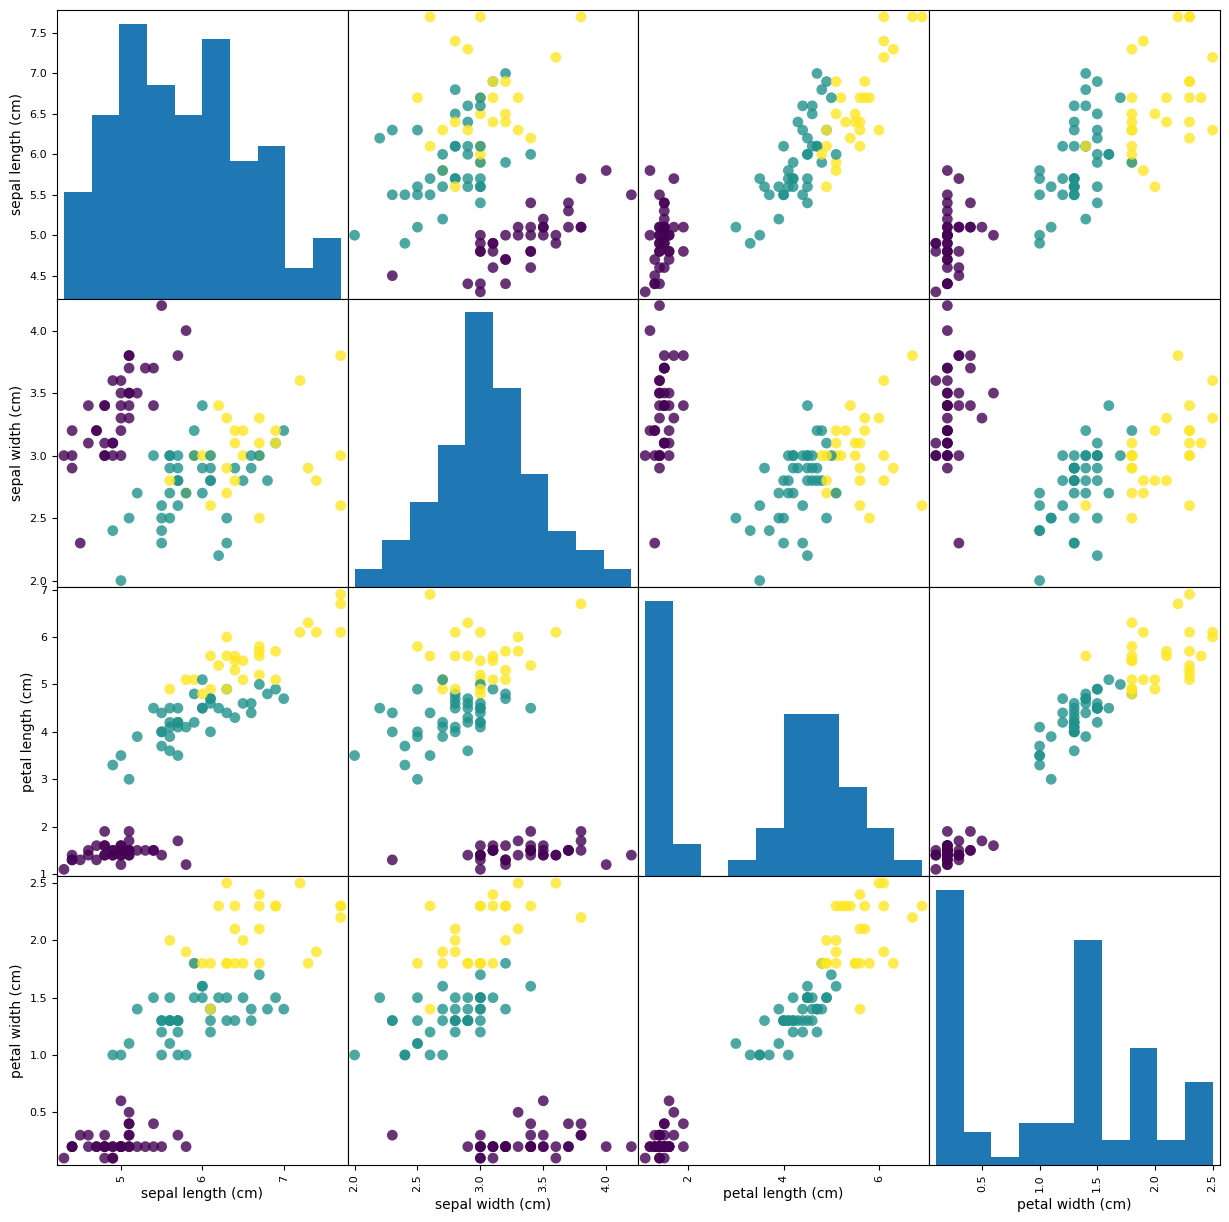

In [573]:
grr = pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o', s=60, alpha=.8)

# Model

In [574]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [575]:
print(knn.fit(X_train, y_train))

KNeighborsClassifier()


# Inference

In [576]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print(f"Prediction: {prediction[0]}\nPredicted Class: {dataset['target_names'][prediction][0]}")


Prediction: 0
Predicted Class: setosa


# Evaluation

In [577]:
y_pred = knn.predict(X_test)
print(f"Accuracy: {np.mean(y_pred == y_test)*100:.2f} %")

Accuracy: 93.33 %
